# Importations

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [40]:
data = pd.read_parquet('data.parquet',engine='pyarrow')
data = data.dropna(subset=[' race', ' charclass', ' zone', ' guild', ' timestamp'])
#data.drop(data[data["race"].str.isalpha()].index)
print(data.shape)
print(data["where"])

(36513647, 7)
0              Razorfen Kraul
1                     Durotar
2                 The Barrens
3           Silverpine Forest
4                Winterspring
                  ...        
36513642            Orgrimmar
36513643        Warsong Gulch
36513644         Winterspring
36513645     Thousand Needles
36513646     Blackrock Depths
Name: where, Length: 36513647, dtype: category
Categories (173, object): ['Razorfen Kraul', 'Durotar', 'The Barrens', 'Silverpine Forest', ..., 'The Forbidding Sea', '15641', '61477', '1007城']


In [36]:
data.sort_values(by="race")
uniquePlayerData=data.drop_duplicates(subset="player_id")
print(uniquePlayerData.shape)
data.head()

(29096, 7)


,player_id,guild,level,race,class,where,datetime
128,47075,NaN,8,Blood Elf,Rogue,Orgrimmar,2007-06-12 03:20:35
129,47371,NaN,7,Blood Elf,Rogue,Eversong Woods,2007-06-12 03:20:35
130,47349,NaN,10,Blood Elf,Priest,Eversong Woods,2007-06-12 03:20:35
131,38498,5.0,10,Blood Elf,Paladin,Eversong Woods,2007-06-12 03:20:35
132,41531,19.0,17,Blood Elf,Hunter,Wailing Caverns,2007-06-12 03:20:40


[29091     1     1     1     1     1     0     0     0     0]


c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26063 (\N{CJK UNIFIED IDEOGRAPH-65CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22934 (\N{CJK UNIFIED IDEOGRAPH-5996}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


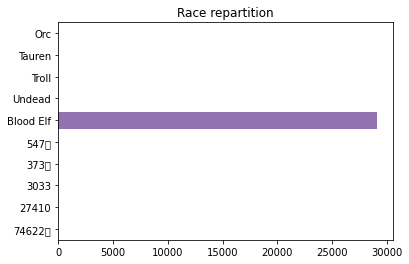

In [37]:
print(uniquePlayerData["race"].value_counts().values)
sns.barplot(uniquePlayerData,y=uniquePlayerData["race"].value_counts().index,x=uniquePlayerData["race"].value_counts().values)
plt.title("Race repartition")
plt.show()